# Python Implementation of Decision Trees

You will be using the heart disease dataset provided to predict whether a person has heart disease or not using Decision Trees.

In the following sections, we'll:
1. clean and prepare the data,
2. build a decision tree with default hyperparameters,
3. understand all the hyperparameters that we can tune, and finally
4. choose the optimal hyperparameters using grid search cross-validation.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

In [3]:
import pydotplus, graphviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
 pip install pydotplus

In [50]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

# Load the data

In [6]:
# Read the data into a dataframe
df = pd.read_csv("heart_disease_case_study.csv",sep = ';')

In [7]:
# View the data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# View shape of data
df.shape

(70000, 13)

In [9]:
# View the columns
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
# View the statistics of data
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# View the count of patients have heart diseaese
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [12]:
# Assign the output column
y = df['cardio']
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [13]:
# Assign the input features
x = df.drop('cardio', axis = 1)

In [14]:
# View the features
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0


## Train a simple Decision tree model

In [15]:
# load sklearn libraries required to construct a Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [16]:
# Split the data into training and testing data
#testdata = 20, train = 80
# 0 is seed value
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [17]:
# View the shape of training data
X_train.shape

(56000, 12)

In [18]:
# View the shape of test data
X_test.shape

(14000, 12)

In [19]:
#original x shape
x.shape

(70000, 12)

# Decision Tree

In [20]:
# Create a Decision Tree
dt_basic = DecisionTreeClassifier(max_depth = 10)

In [21]:
# View the attributes of tree created
dt_basic

DecisionTreeClassifier(max_depth=10)

In [22]:
# Fit the training data
dt_basic.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [23]:
# Predict based on test data
y_pred = dt_basic.predict(X_test)

In [24]:
# View the predictions
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# Accuracy

In [25]:
# Calculate Accuracy
#y test data
y_test

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

In [26]:
# View the accuracy
# actual val = y_test, predicted val = y_pred
accuracy_val = metrics.accuracy_score(y_test, y_pred)
accuracy_val

0.7260714285714286

# Confusion Matrix 

In [27]:
# Create and print confusion matrix
confusion_matrix(y_test, y_pred)

array([[5601, 1468],
       [2367, 4564]], dtype=int64)

In [28]:
#Predicted     1   0
#actual     1 TP   FN 
#           0 FP   TN

In [29]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7069
           1       0.76      0.66      0.70      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000



In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6584908382628769

In [31]:
# Calculate the number of nodes in the tree

## Visualize the Tree

In [32]:
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [33]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [34]:
from six import StringIO
#string IO is used for input output IO format

In [49]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

In [36]:
#Select input columns as features
features = list(x.columns[0:])

In [37]:
#View the features
features

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [45]:
#Visualise the tree using the following steps:
dot_data = StringIO() # a file
export_graphviz(dt_basic, out_file = dot_data, feature_names = features, filled = True, rounded = True)

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [47]:
graph

In [48]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [51]:
#to see the nodes in Dt
dt_basic.tree_.node_count


1155

## Hyperparamter Tuning Optimization 

### Max_depth

In [52]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [53]:
#Choose and mention the hyperparameter
parameters = {'max_depth': range(1,10)}
parameters

{'max_depth': range(1, 10)}

In [54]:
#You can define number of folds for cross-validation as follows:
n_folds = 5

In [55]:
#Build a Decision Tree
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)

In [56]:
#Import the required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [57]:
#Use GridSearchCV to buid a tree
tree = GridSearchCV(dtree, parameters, cv =n_folds, scoring='accuracy', return_train_score = True)
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [58]:
#Fit the training data
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [59]:
#View the score
scores = tree.cv_results_
scores

{'mean_fit_time': array([0.03510427, 0.05185523, 0.07001333, 0.08996735, 0.11208382,
        0.12566328, 0.14303136, 0.15660229, 0.17872238]),
 'std_fit_time': array([0.00689342, 0.0037794 , 0.00292141, 0.00485417, 0.00785429,
        0.00670622, 0.00431868, 0.00674261, 0.00687595]),
 'mean_score_time': array([0.00399251, 0.00418849, 0.0039896 , 0.00378742, 0.00438867,
        0.00404844, 0.00437894, 0.00396252, 0.0047873 ]),
 'std_score_time': array([1.38294285e-05, 3.99619536e-04, 8.34124359e-07, 3.97649502e-04,
        7.98654763e-04, 1.17732301e-04, 4.80038141e-04, 5.66393431e-05,
        3.99399515e-04]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_d

In [60]:
# Plot accuracy vs param_max_depth
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035104,0.006893,0.003993,1.382943e-05,1,{'max_depth': 1},0.711607,0.718839,0.708661,0.711875,...,0.713946,0.004116,8,0.714531,0.712723,0.715268,0.714464,0.712746,0.713946,0.001029
1,0.051855,0.003779,0.004188,3.996195e-04,2,{'max_depth': 2},0.711607,0.718839,0.708661,0.711875,...,0.713946,0.004116,8,0.714531,0.712723,0.715268,0.714464,0.712746,0.713946,0.001029
2,0.070013,0.002921,0.003990,8.341244e-07,3,{'max_depth': 3},0.724375,0.731071,0.719554,0.726696,...,0.725875,0.003825,7,0.726250,0.724576,0.727455,0.725670,0.725424,0.725875,0.000956
3,0.089967,0.004854,0.003787,3.976495e-04,4,{'max_depth': 4},0.730625,0.731161,0.724911,0.727589,...,0.729250,0.002627,3,0.731830,0.729688,0.732098,0.730402,0.729308,0.730665,0.001121
4,0.112084,0.007854,0.004389,7.986548e-04,5,{'max_depth': 5},0.727679,0.734464,0.726696,0.727500,...,0.729786,0.003129,2,0.733080,0.733371,0.735558,0.735558,0.733080,0.734129,0.001171


In [61]:
#best param of the tree
tree.best_params_

{'max_depth': 6}

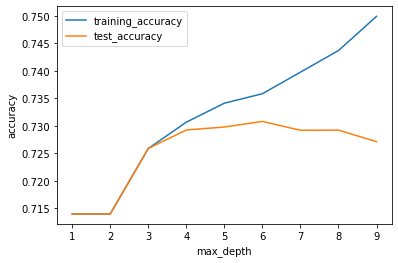

In [62]:
plt.figure
plt.plot(scores["param_max_depth"].data,scores["mean_train_score"],label="training_accuracy")
plt.plot(scores["param_max_depth"].data, scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

after 6 the test is dec and train accuracy is increasing so it is best to use max depth as 6

### Min_samples_leaf

In [63]:
# Choose and mention the hyperparameter
#10 to 200 with 20 step
parameters = {'min_samples_leaf':range(10,200,20)}
parameters

{'min_samples_leaf': range(10, 200, 20)}

In [64]:
# Build a Decision Tree
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)

In [65]:
n_folds = 5

In [66]:
# Build the treeecd c
tree2 = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)

In [67]:
# Fit the training data
tree2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': range(10, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [68]:
scores2 = tree2.cv_results_
scores2

{'mean_fit_time': array([0.3039814 , 0.26169991, 0.23185601, 0.22200689, 0.21542463,
        0.19248562, 0.18970199, 0.18690143, 0.17971992, 0.1723362 ]),
 'std_fit_time': array([0.01219979, 0.02184758, 0.00957716, 0.01309656, 0.01438939,
        0.00738273, 0.00866132, 0.00645466, 0.00942511, 0.00895691]),
 'mean_score_time': array([0.00757318, 0.00538573, 0.00491767, 0.00498562, 0.00499272,
        0.00501242, 0.00538292, 0.00498815, 0.00458784, 0.00438418]),
 'std_score_time': array([1.20015746e-03, 4.88928151e-04, 1.29100823e-04, 3.00596571e-06,
        6.30063596e-04, 5.21463675e-05, 1.35359309e-03, 1.11338352e-03,
        4.89162008e-04, 4.87544428e-04]),
 'param_min_samples_leaf': masked_array(data=[10, 30, 50, 70, 90, 110, 130, 150, 170, 190],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_leaf': 10},
  {'min_samples_leaf': 30},
  {'min_s

In [69]:
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.303981,0.012200,0.007573,0.001200,10,{'min_samples_leaf': 10},0.684107,0.680268,0.683125,0.675804,...,0.679500,0.003918,10,0.803839,0.803080,0.802210,0.804554,0.802813,0.803299,0.000817
1,0.261700,0.021848,0.005386,0.000489,30,{'min_samples_leaf': 30},0.719911,0.720000,0.716339,0.714375,...,0.716857,0.002678,9,0.759665,0.760112,0.759978,0.761228,0.760335,0.760263,0.000529
2,0.231856,0.009577,0.004918,0.000129,50,{'min_samples_leaf': 50},0.723661,0.727232,0.723214,0.723304,...,0.724571,0.001557,8,0.750915,0.750379,0.751138,0.751652,0.752009,0.751219,0.000568
3,0.222007,0.013097,0.004986,0.000003,70,{'min_samples_leaf': 70},0.724821,0.730179,0.721786,0.728304,...,0.725911,0.002974,7,0.746071,0.746607,0.747299,0.748705,0.746652,0.747067,0.000907
4,0.215425,0.014389,0.004993,0.000630,90,{'min_samples_leaf': 90},0.729107,0.733661,0.722054,0.729286,...,0.728625,0.003725,6,0.744040,0.743571,0.745313,0.745335,0.743259,0.744304,0.000869


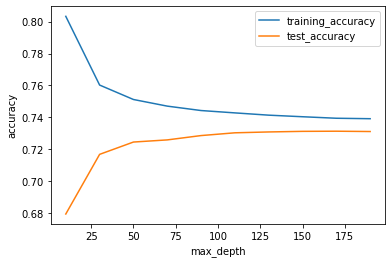

In [70]:
# Plot accuracy vs param_min_samples_leaf
plt.figure
plt.plot(scores2["param_min_samples_leaf"].data,scores2["mean_train_score"],label="training_accuracy")
plt.plot(scores2["param_min_samples_leaf"].data, scores2["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [71]:
tree2.best_params_

{'min_samples_leaf': 170}

# Multiple parameters

In [72]:
# Create a Parameter grid
param_grid = {
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split': range(50,150,50),
    'criterion':['gini','entropy']
    
             }
param_grid

{'max_depth': range(5, 15, 5),
 'min_samples_leaf': range(50, 150, 50),
 'min_samples_split': range(50, 150, 50),
 'criterion': ['gini', 'entropy']}

In [73]:
n_folds =5

In [74]:
# Create a Decision Tree
Dtree = DecisionTreeClassifier()
Dtree

DecisionTreeClassifier()

In [75]:
# Create a Grid with parameters
grid=GridSearchCV(Dtree, param_grid, cv =n_folds, n_jobs =-1, return_train_score = True)

In [76]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [77]:
score = grid.cv_results_
score

{'mean_fit_time': array([0.22041059, 0.28683057, 0.32731619, 0.22699108, 0.386766  ,
        0.37798953, 0.36921563, 0.40072918, 0.31974521, 0.2872335 ,
        0.29680681, 0.25312691, 0.50802016, 0.7302475 , 0.61914444,
        0.43626151]),
 'std_fit_time': array([0.02578576, 0.06359609, 0.0766844 , 0.02603518, 0.01646766,
        0.01503267, 0.0259704 , 0.01058244, 0.03684518, 0.01515177,
        0.02571173, 0.01517413, 0.02091312, 0.13373732, 0.09492575,
        0.05125329]),
 'mean_score_time': array([0.00877709, 0.01835103, 0.01356454, 0.00878167, 0.00758033,
        0.00837736, 0.00757737, 0.00877643, 0.00905414, 0.00718265,
        0.00721073, 0.01037049, 0.00957427, 0.01695404, 0.00777936,
        0.00742102]),
 'std_score_time': array([0.00369938, 0.01601468, 0.01172658, 0.00131966, 0.00101695,
        0.00256901, 0.001018  , 0.00230929, 0.00366024, 0.00074858,
        0.00045801, 0.00638967, 0.00279268, 0.01157899, 0.00040019,
        0.00144004]),
 'param_criterion': masked

In [78]:
cv_result = pd.DataFrame(score)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.220411,0.025786,0.008777,0.003699,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.728036,...,0.729946,0.003080,9,0.732679,0.733147,0.735290,0.735246,0.732790,0.733830,0.001184
1,0.286831,0.063596,0.018351,0.016015,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.728036,...,0.729946,0.003080,9,0.732679,0.733147,0.735290,0.735246,0.732790,0.733830,0.001184
2,0.327316,0.076684,0.013565,0.011727,gini,5,100,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.728036,...,0.729875,0.003211,11,0.732679,0.732991,0.735268,0.735246,0.733103,0.733857,0.001151
3,0.226991,0.026035,0.008782,0.001320,gini,5,100,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.728036,...,0.729875,0.003211,11,0.732679,0.732991,0.735268,0.735246,0.733103,0.733857,0.001151
4,0.386766,0.016468,0.007580,0.001017,gini,10,50,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.730357,...,0.729393,0.001763,15,0.744062,0.744263,0.744487,0.745246,0.744554,0.744522,0.000401


In [79]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [80]:
#Accuracy of the model
grid.best_score_

0.7314107142857142

In [81]:
#getting the best parms
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [82]:
#fitting using the best param
best_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [83]:
#Accuracy
best_grid.score(X_test, y_test)

0.7281428571428571

In [84]:
conda install graphviz

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - graphviz


The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 4.12.0-py39haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [85]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [86]:
# Visualise the tree
dot_data = StringIO() # a file
export_graphviz(best_grid, out_file = dot_data, feature_names = features, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Create a less complex tree easy to visualize

In [ ]:
# Create a Tree

In [ ]:
# Visualise the Tree

In [ ]:
# View the accuracy score